Nhóm:
- Phạm Thị Hoà - MSHV: 23C23007
- Trịnh Quang Trí - MSHV: 23C23011

In [16]:
library(astsa)
library(dplyr)
library(tidyr)


### NGUỒN GỐC VÀ MÔ TẢ BỘ DỮ LIỆU
- Bộ dữ liệu được lấy từ Daily thư viện Meteostat, một thư viện Python chuyên cung cấp dữ liệu khí hậu và thời tiết toàn cầu. Cụ thể, Daily từ thư viện này để truy xuất dữ liệu nhiệt độ theo ngày tại thành phố New York.
- Thời gian thu thập: Từ tháng 10/2014 đến tháng 10/2024
- Dữ liệu ban đầu được truy xuất theo từng ngày, bao gồm thông tin nhiệt độ cụ thể của từng ngày từ tháng 10/2014 đến tháng 10/2024
- Để giảm độ chi tiết và dễ dàng phân tích xu hướng, nhóm em đã group by (gom nhóm) dữ liệu theo tháng. Điều này có nghĩa là tất cả các giá trị nhiệt độ trong cùng một tháng được gom nhóm lại.
- Với mỗi tháng, nhóm em đã tính nhiệt độ trung bình từ dữ liệu ngày. Kết quả là một chuỗi dữ liệu với mỗi giá trị tương ứng với nhiệt độ trung bình của một tháng cụ thể.


In [17]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)
file_name = "/data/tavg.csv"

In [18]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, file_name, sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,X,value
,<chr>,<dbl>
1,2014-11-01,6.630000
2,2014-12-01,4.396774
3,2015-01-01,-1.764516
4,2015-02-01,-4.857143
5,2015-03-01,3.100000
6,2015-04-01,12.303333


In [19]:
colnames(df)[colnames(df) == "X"] <- "date"
df$date <- as.Date(df$date)
df <- df[order(df$date), ]
df

,date,value
,<date>,<dbl>
1,2014-11-01,6.6300000
2,2014-12-01,4.3967742
3,2015-01-01,-1.7645161
4,2015-02-01,-4.8571429
5,2015-03-01,3.1000000
6,2015-04-01,12.3033333
7,2015-05-01,19.8387097
8,2015-06-01,21.9933333
9,2015-07-01,26.0129032


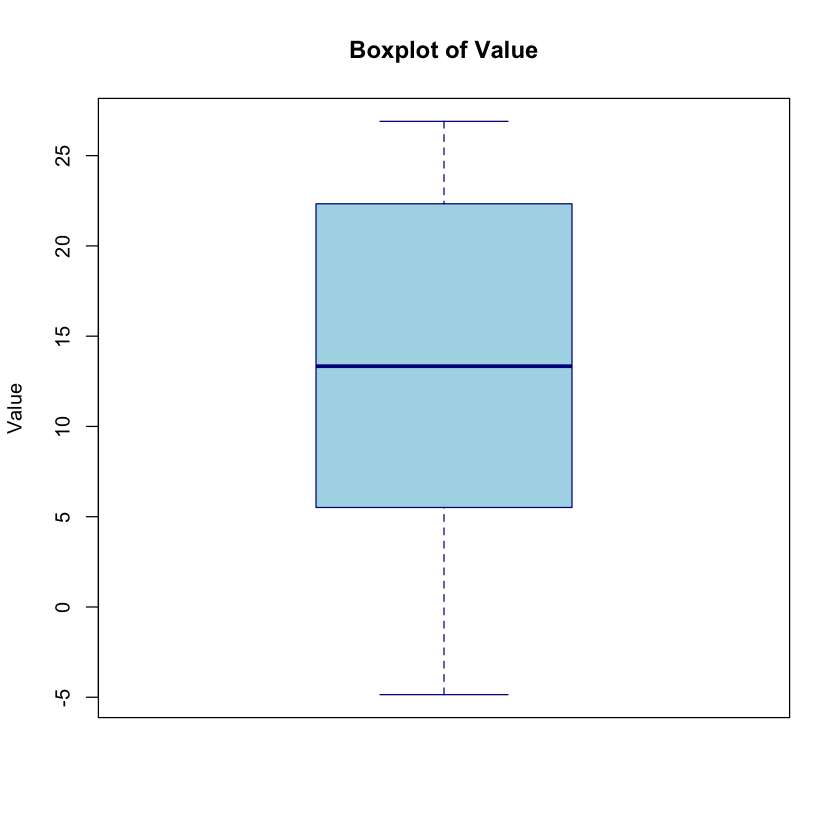

In [20]:
# Vẽ box plot cho cột 'value'
boxplot(df$value, 
        main = "Boxplot of Value",   # Tiêu đề của boxplot
        ylab = "Value",              # Nhãn trục y
        col = "lightblue",           # Màu sắc của boxplot
        border = "darkblue")         # Màu sắc viền boxplot

- Dữ liệu không có giá trị ngoại lai

In [21]:
total_missing <- sum(is.na(df))
total_missing

[1] 0

- Dữ liệu không có missing value

In [22]:
df<-ts(df[,-1],start=c(2014,11),deltat=1/12)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,,,,,,,,,,,6.6300000,4.3967742
2015,-1.7645161,-4.8571429,3.1000000,12.3033333,19.8387097,21.9933333,26.0129032,25.8903226,23.0766667,13.9580645,11.4300000,9.8935484
2016,0.9354839,2.9862069,9.2161290,11.8766667,16.8870968,22.6900000,26.2580645,26.8677419,23.1000000,15.5387097,10.4766667,4.4064516
2017,3.8709677,5.4714286,4.6451613,13.2900000,16.4290323,22.7533333,25.2483871,24.2000000,22.0833333,18.6354839,9.7066667,2.9709677
2018,0.4258065,5.4821429,4.7870968,9.4833333,18.9548387,22.2300000,25.3322581,26.4354839,22.4500000,15.3677419,8.0533333,5.3548387
2019,1.4451613,2.7214286,5.5387097,12.4500000,16.7387097,22.4366667,26.6903226,24.9709677,22.1500000,16.3741935,7.8066667,4.4677419
2020,4.6129032,4.7896552,8.8032258,10.3700000,15.8096774,23.0066667,26.9000000,25.7483871,21.7033333,15.6193548,12.1433333,4.9225806
2021,2.4967742,1.8785714,7.7096774,12.1833333,16.9838710,23.2300000,25.0290323,25.6000000,22.6066667,18.0612903,8.6133333,5.6387097
2022,-1.9870968,3.4500000,7.4645161,11.1900000,17.5774194,21.7700000,26.6258065,25.3870968,20.0733333,13.2387097,9.3100000,2.4258065
2023,4.8645161,5.1964286,6.7354839,13.3833333,17.0612903,20.8733333,25.9903226,24.1709677,21.5733333,16.7032258,9.2466667,7.0387097


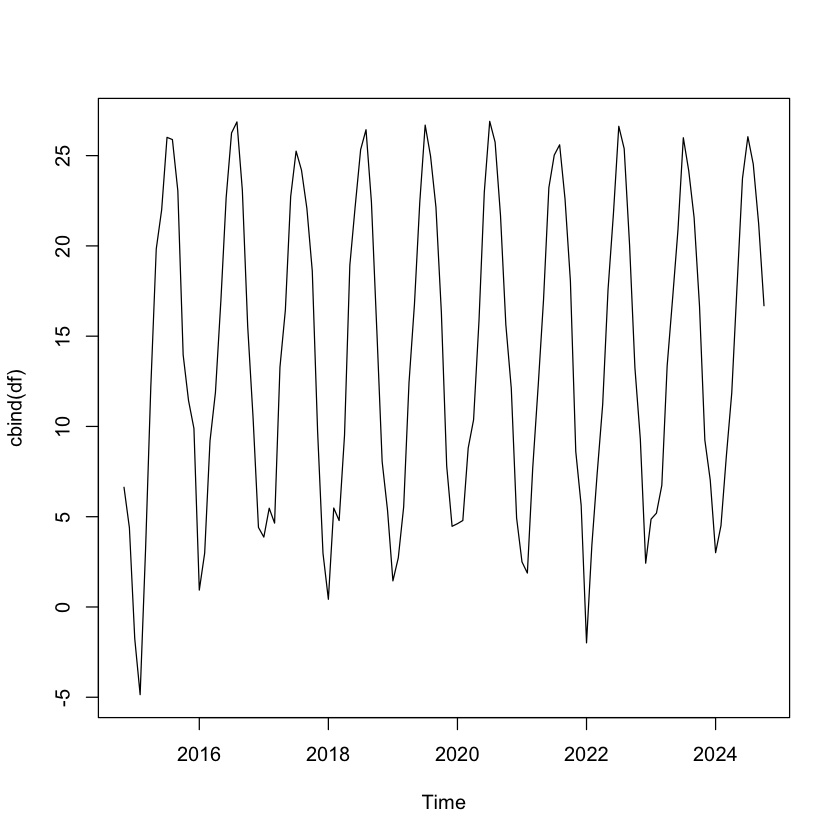

In [23]:
plot.ts(cbind(df))

- Dữ liệu không có Trend nên (Trung bình và phương sai không phụ thuộc vào thời gian t), dữ liệu đã là một timeseries dừng nên ta có thể áp dụng mô hình dựa trên dữ liệu gốc
- Dữ liệu có tính chu kỳ, lặp lại sau 12 tháng

ACF,0.84,0.49,0.02,-0.44,-0.77,-0.89,-0.77,-0.45,-0.02,0.42,⋯,0.00,-0.32,-0.54,-0.62,-0.53,-0.31,0.00,0.30,0.51,0.58
PACF,0.84,-0.75,-0.49,-0.41,-0.13,-0.04,0.07,0.07,0.02,0.10,⋯,-0.02,0.08,0.02,-0.04,0.01,-0.08,0.08,-0.02,0.01,-0.01


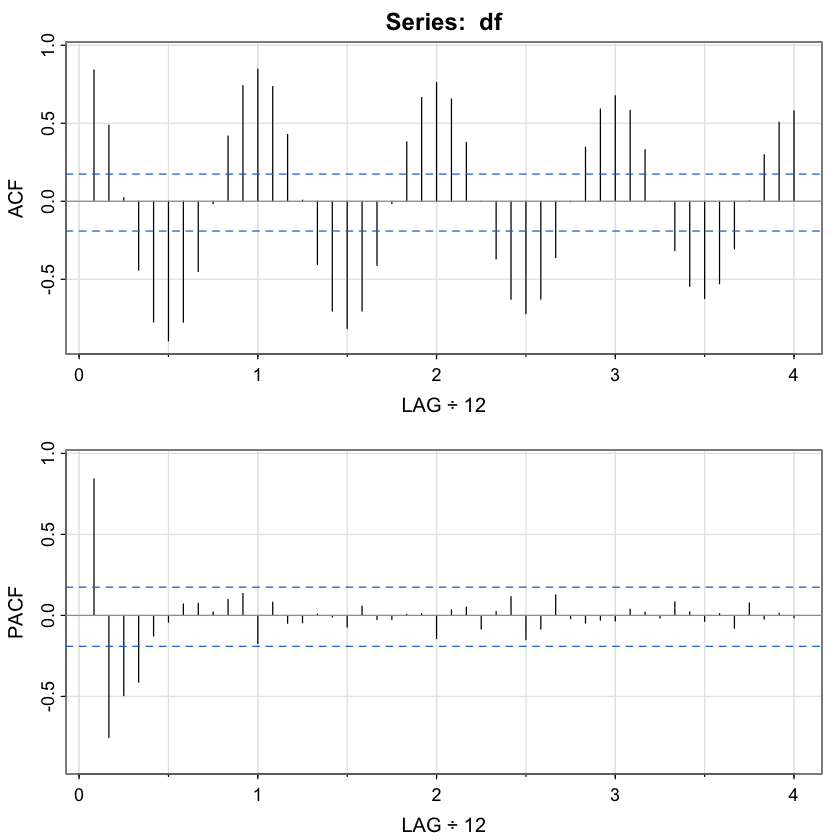

In [24]:
acf2(df)

- ACF: Tailoff
- PACF: cutoff kể từ p = 4

### THỬ MÔ HÌNH

initial  value 0.779805 
iter   2 value 0.662810
iter   3 value 0.655599
iter   4 value 0.651635
iter   5 value 0.649531
iter   6 value 0.649361
iter   7 value 0.649358
iter   8 value 0.649357
iter   8 value 0.649357
iter   8 value 0.649357
final  value 0.649357 
converged
initial  value 0.770208 
iter   2 value 0.768766
iter   3 value 0.764264
iter   4 value 0.764183
iter   5 value 0.764180
iter   5 value 0.764180
iter   5 value 0.764180
final  value 0.764180 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
sar1      -0.4942 0.0925 -5.3421  0.0000
constant   0.0105 0.0118  0.8881  0.3765

sigma^2 estimated as 4.469362 on 106 degrees of freedom 
 
AIC = 4.421792  AICc = 4.42285  BIC = 4.496295 
 


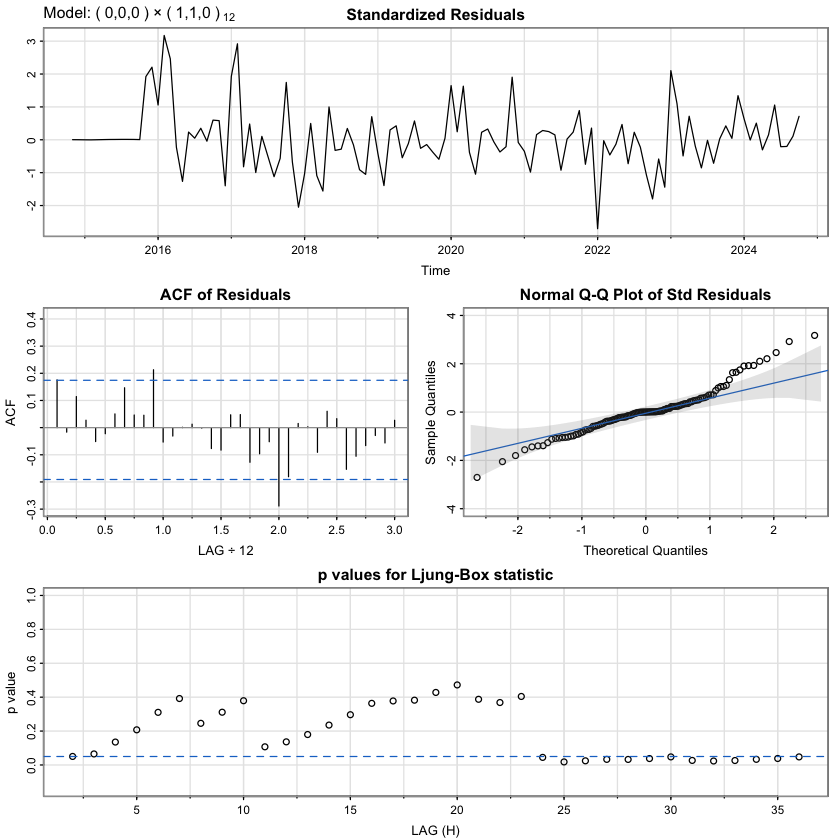

In [25]:
model_1 = sarima(df, 0, 0, 0, 1, 1, 0, 12)

#### Nhận xét đồ thị hàm ACF và PACF của residuals (chỉ cần nhận xét theo ý hiểu của bản thân)

- Biểu đồ Standardized Residuals: 
    - Biểu đồ này hiển thị chuỗi dư lượng sau khi đã ước lượng mô hình
    - Nhìn chung, dư lượng có vẻ phân phối ngẫu nhiên quanh giá trị trung bình 0, không có xu hướng rõ rệt hoặc mẫu hình nào lặp lại. Tuy nhiên, có một vài giá trị nằm ngoài phạm vi [−2,2], có thể là các ngoại lệ nhỏ
- ACF of Residuals: 
    - Hầu hết các giá trị tự tương quan (ACF) nằm trong ngưỡng tin cậy (đường màu xanh), ngoại trừ một vài điểm nhẹ vượt ngưỡng điều này cho thấy rằng phần lớn dư lượng là không tương quan
- Normal Q-Q Plot of Std Residuals: Đường chéo đại diện cho phân phối chuẩn lý thuyết, và các điểm đại diện cho dữ liệu. Hầu hết các điểm nằm trên đường này, ngoại trừ các điểm ở đuôi (xa giá trị trung tâm). Điều này cho thấy dư lượng có thể hơi lệch khỏi phân phối chuẩn, đặc biệt ở phần đuôi, nhưng vẫn tương đối chấp nhận được.

initial  value 0.747459 
iter   2 value 0.581541
iter   3 value 0.573223
iter   4 value 0.566763
iter   5 value 0.563783
iter   6 value 0.563739
iter   7 value 0.563735
iter   7 value 0.563735
iter   7 value 0.563735
final  value 0.563735 
converged
initial  value 0.773105 
iter   2 value 0.747215
iter   3 value 0.740704
iter   4 value 0.738880
iter   5 value 0.738407
iter   6 value 0.738374
iter   7 value 0.738373
iter   8 value 0.738373
iter   8 value 0.738373
iter   8 value 0.738373
final  value 0.738373 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1        0.2006 0.0982  2.0430  0.0436
ar2       -0.0738 0.0994 -0.7424  0.4596
ar3        0.1373 0.0986  1.3934  0.1665
ar4       -0.0063 0.1087 -0.0580  0.9539
sar1      -0.5236 0.0883 -5.9268  0.0000
constant   0.0117 0.0153  0.7655  0.4457

sigma^2 estimated as 4.22179 on 102 degrees of freedom 
 
AIC = 4.444252  AICc = 4.451953  BIC = 4.618094 
 


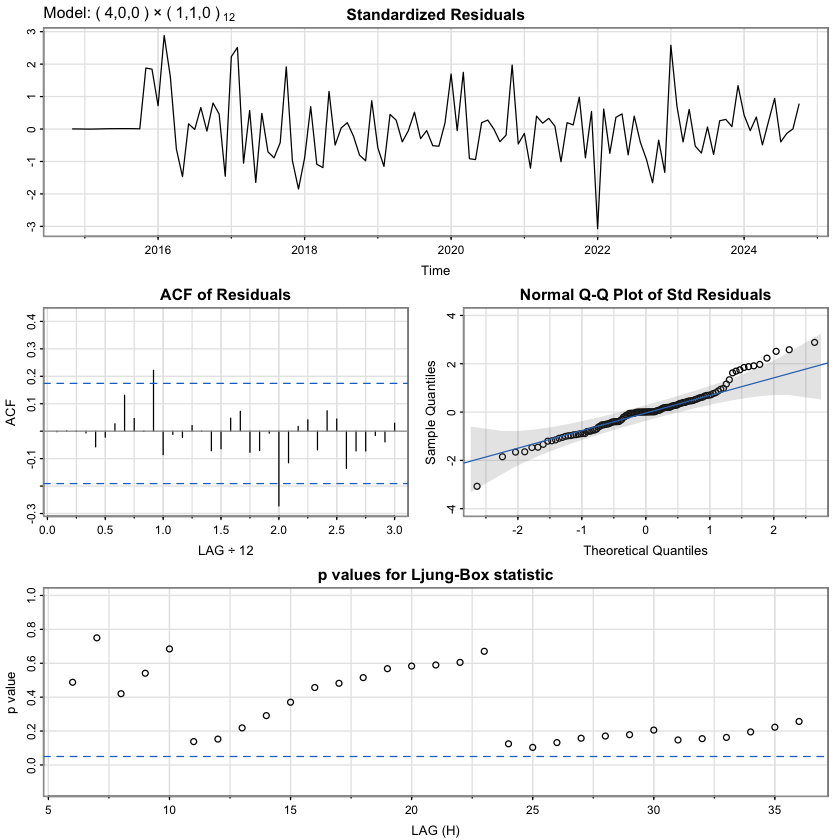

In [26]:
model_2 = sarima(df, 4, 0, 0, 1, 1, 0, 12)

- Biểu đồ Standardized Residuals:
    - Dư lượng vẫn phân phối quanh giá trị trung bình 0 mà không có mẫu hình rõ ràng.
    - Tuy nhiên, độ biến động có vẻ đã được cải thiện một chút so với mô hình trước, với ít giá trị ngoại lệ hơn (nằm ngoài phạm vi [−2,2]).
- ACF of Residuals: Hầu hết các giá trị tự tương quan (ACF) đều nằm trong khoảng tin cậy (đường màu xanh). Số lượng điểm vượt ngưỡng ở mô hình này ít hơn so với mô hình trước. Điều này cho thấy mô hình SARIMA (4,0,0)(1,1,0)_12 có khả năng nắm bắt cấu trúc dữ liệu tốt hơn so với mô hình (0,0,0)(1,1,0)_12
- Normal Q-Q Plot of Std Residuals: Hầu hết các điểm vẫn nằm trên đường chéo, ngoại trừ các điểm ở đuôi. So với mô hình trước, dư lượng trong mô hình này khớp với phân phối chuẩn tốt hơn, đặc biệt ở phần trung tâm.

initial  value 1.131848 
iter   2 value 0.880072
iter   3 value 0.738203
iter   4 value 0.707829
iter   5 value 0.693675
iter   6 value 0.688042
iter   7 value 0.685937
iter   8 value 0.685595
iter   9 value 0.685574
iter  10 value 0.685572
iter  11 value 0.685572
iter  11 value 0.685572
iter  11 value 0.685572
final  value 0.685572 
converged
initial  value 0.806828 
iter   2 value 0.800365
iter   3 value 0.799951
iter   4 value 0.799821
iter   5 value 0.799816
iter   5 value 0.799816
iter   5 value 0.799816
final  value 0.799816 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE t.value p.value
ar1   -0.6662 0.0972 -6.8520  0.0000
ar2   -0.6158 0.1112 -5.5359  0.0000
ar3   -0.3269 0.1119 -2.9212  0.0043
ar4   -0.1564 0.0978 -1.5986  0.1130
sar1  -0.5089 0.0892 -5.7077  0.0000

sigma^2 estimated as 4.752252 on 102 degrees of freedom 
 
AIC = 4.549659  AICc = 4.555211  BIC = 4.699537 
 


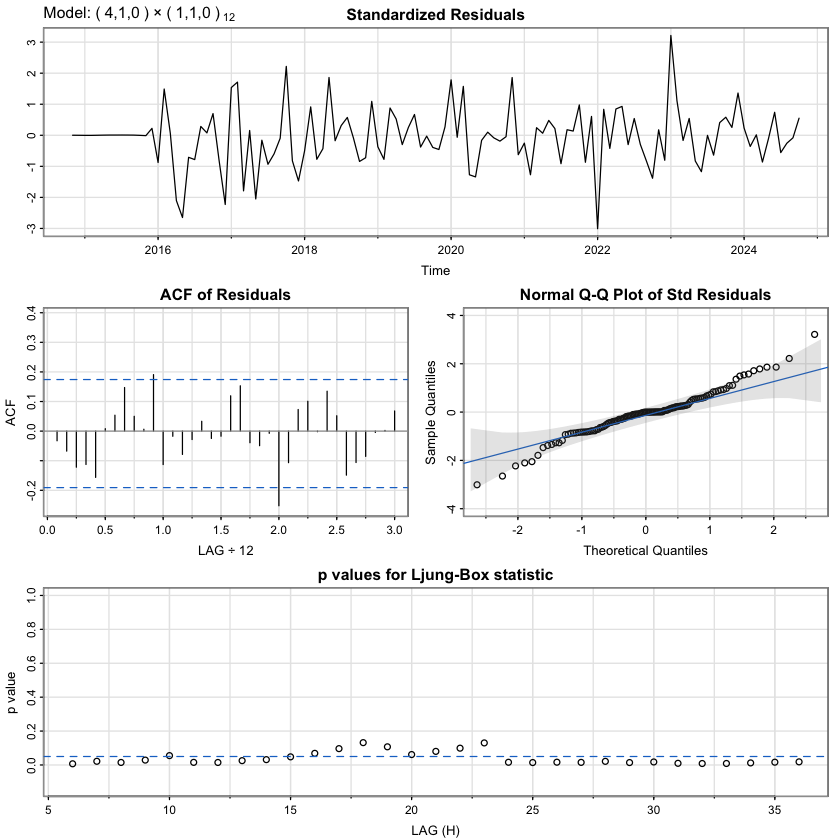

In [27]:
model_3 = sarima(df, 4, 1, 0, 1, 1, 0, 12)

$$
\begin{array}{|l|c|c|c|}
\hline
\textbf{Mô hình} & \textbf{AIC} & \textbf{BIC} & \textbf{AICc} \\ \hline
\text{SARIMA(0,0,0)(1,1,0)\_12} & 4.421 & 4.423 & 4.496 \\ \hline
\text{SARIMA(4,0,0)(1,1,0)\_12} & 4.444 & 4,452 & 4.618 \\ \hline
\text{SARIMA(4,1,0)(1,1,0)\_12} & 4.55 & 4.555 & 4.7 \\ \hline
\end{array}
$$


### LỰA CHỌN MÔ HÌNH

### GIẢI THÍCH CÁC TIÊU CHÍ:
- AIC (Akaike Information Criterion): Tiêu chí thông tin Akaike, giá trị càng thấp càng tốt vì nó thể hiện mô hình có độ khớp tốt nhất với dữ liệu trong khi cân nhắc số lượng tham số.
- BIC (Bayesian Information Criterion): Tiêu chí thông tin Bayes, tương tự AIC nhưng có trọng số phạt lớn hơn khi thêm tham số vào mô hình. Giá trị càng thấp càng tốt.
- AICc: Là biến thể của AIC điều chỉnh cho kích thước mẫu nhỏ. Thích hợp hơn khi số mẫu ít hoặc khi so sánh các mô hình với số lượng tham số khác nhau.


- SARIMA(0,0,0)(1,1,0)_12:
    - Có giá trị AIC (4.421), BIC (4.423) và AICc (4.496) thấp nhất trong tất cả các mô hình.
    - Điều này cho thấy mô hình này có độ khớp tốt nhất và không quá phức tạp (số tham số ít).
- SARIMA(4,0,0)(1,1,0)_12: 
    - Giá trị AIC (4.444) và BIC (4.452) cao hơn một chút so với SARIMA(0,0,0)(1,1,0)_12
    - Mặc dù mô hình cải thiện khả năng nắm bắt cấu trúc chuỗi (như đã phân tích từ biểu đồ), sự phức tạp tăng lên không đủ để bù đắp giá trị tiêu chí cao hơn.
- SARIMA(4,1,0)(1,1,0)_12:
    - Có giá trị AIC (4.55), BIC (4.555) và AICc (4.7) cao nhất trong các mô hình.
    - Điều này cho thấy mô hình này phức tạp hơn nhưng không cải thiện được độ khớp đủ để giảm các tiêu chí.

#### KẾT LUẬN
- Mô hình tốt nhất là SARIMA(0,0,0)(1,1,0)_12 vì nó có giá trị AIC, BIC, và AICc thấp nhất, thể hiện sự phù hợp tối ưu với dữ liệu trong khi duy trì sự đơn giản.
- Mô hình SARIMA(4,0,0)(1,1,0)_12 mô hình hóa cấu trúc tốt hơn tuy nhiên nó phức tạp hơn và không mang lại hiệu quả đáng kể.
- Do đó ta chọn mô hình model_1 = sarima(df, 0, 0, 0, 1, 1, 0, 12)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,,9.652677,5.099186
2025,2.111619,3.587864,6.922511,12.134568,17.548072,22.554049,26.290877,25.630079,22.203954,16.239018,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,,1.784157,1.784157
2025,1.784157,1.784157,1.784157,1.784157,1.784157,1.784157,1.784157,1.784157,1.784157,1.784157,,


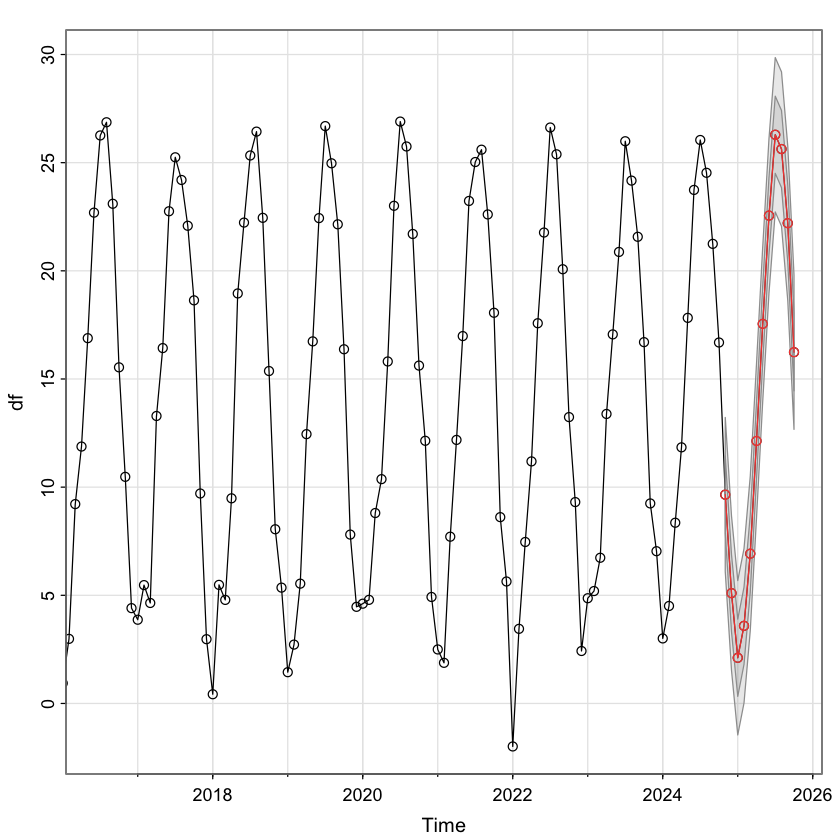

In [28]:
model_pred <- sarima.for(df, n.ahead = 12, 0, 0, 0, 1, 1, 1, 12)
model_pred

In [29]:
# Giá trị dự báo
forecast <- model_pred$pred

# Sai số chuẩn
se <- model_pred$se


# Tính khoảng tin cậy 95%
z <- 1.96  # Hệ số cho mức ý nghĩa 95%
lower_bound <- forecast - z * se
upper_bound <- forecast + z * se

In [30]:
print("lower")
lower_bound
print("upper")
upper_bound

[1] "lower"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,,6.15572905,1.60223715
2025,-1.38532919,0.09091577,3.42556262,8.63761993,14.05112341,19.05710110,22.79392898,22.13313078,18.70700521,12.74206986,,


[1] "upper"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2024,,,,,,,,,,,13.149626,8.596134
2025,5.608568,7.084813,10.419459,15.631517,21.045020,26.050998,29.787826,29.127028,25.700902,19.735967,,


### Nhận xét xem các giá trị dự báo mà mô hình đưa ra có phù hợp với dữ liệu hay không?
- Chuỗi dữ liệu có sự dao động rõ rệt theo chu kỳ, với các đỉnh và đáy lặp lại gần như đều đặn mỗi năm. Điều này cho thấy dữ liệu có tính mùa vụ.
- Phần dữ liệu dự báo (được biểu diễn bằng đường màu đỏ và kèm dải xám thể hiện khoảng tin cậy). Giá trị dự báo tiếp tục thể hiện xu hướng mùa vụ, phù hợp với các chu kỳ trước đó.
- Khi thời gian dự báo càng xa, khoảng tin cậy (dải xám) mở rộng, điều này cho thấy mức độ không chắc chắn tăng dần theo thời gian.
- Giá trị dự báo tương đối khớp với mô hình dao động đã quan sát được từ dữ liệu lịch sử. Điều này cho thấy mô hình được sử dụng có khả năng bắt được quy luật chu kỳ/mùa vụ của chuỗi dữ liệu.

### Kết luận
- Nhiệt độ có sự dao động theo chu kỳ mùa vụ với mức tăng vào mùa hè và giảm vào mùa đông.
- Nhiệt độ trung bình hàng năm có dao động nhưng không có xu hướng tăng hoặc giảm rõ rệt trên toàn giai đoạn 2014–2024. Các giá trị nhiệt độ vào mùa đông (tháng 1, 2) thấp nhất hầu như duy trì, trong khi các tháng hè (tháng 7, 8) cho thấy mức nhiệt độ cao ổn định.
- Nhiệt độ cao nhất: Thường xảy ra vào tháng 7 và đôi khi kéo dài sang tháng 8. Trong các năm, giá trị nhiệt độ cao nhất là khoảng 26°C.
- Nhiệt độ thấp nhất: Thường rơi vào tháng 1 hoặc tháng 2 với mức nhiệt độ trung bình thấp nhất là -4.85°C (tháng 2/2015).
- Nhiệt độ tăng dần từ tháng 2 đến tháng 7, đạt đỉnh vào giữa mùa hè (tháng 7–8), sau đó giảm dần từ tháng 9 đến tháng 1.
- Các chu kỳ mùa vụ lặp lại khá đều đặn qua các năm, cho thấy sự ổn định trong mô hình nhiệt độ.
- Không có xu hướng tăng hoặc giảm nhiệt độ trung bình đáng kể qua 10 năm. Nhiệt độ trung bình hầu hết giữ ổn định, phản ánh sự cân bằng khí hậu dài hạn.

### ĐỐI VỚI DỮ LIỆU NHIỆT ĐỘ DỰ BÁO:
- Dữ liệu cho thấy sự dao động nhiệt độ theo chu kỳ mùa vụ, tương tự như các năm trước đó trong chuỗi dữ liệu lịch sử.
- Nhiệt độ bắt đầu giảm dần từ tháng 11/2024, đạt mức thấp nhất vào khoảng tháng 1/2025, sau đó tăng dần và đạt đỉnh vào mùa hè (khoảng tháng 7/2025), sau đó giảm trở lại vào mùa thu.
- Thấp nhất: Nhiệt độ thấp nhất được dự báo rơi vào tháng 1/2025 với giá trị khoảng -1.39°C. Điều này phù hợp với mô hình khí hậu lịch sử, trong đó nhiệt độ vào mùa đông thường đạt giá trị thấp nhất.
- Cao nhất: Nhiệt độ cao nhất dự báo vào tháng 7/2025 với giá trị 22.79°C, phản ánh đỉnh nhiệt mùa hè như các năm trước.
- Dữ liệu dự báo phù hợp với xu hướng lịch sử từ 2014–2024. Nhiệt độ cao nhất và thấp nhất dự báo nằm trong khoảng dao động của dữ liệu thực tế trước đó.
- Không có dấu hiệu bất thường hoặc thay đổi lớn trong mô hình khí hậu.
- Dự báo nhiệt độ cho năm 2025 duy trì tính chu kỳ mùa vụ đặc trưng của khí hậu New York, với mùa hè ấm và mùa đông lạnh.
- Không có dấu hiệu tăng hay giảm nhiệt độ trung bình dài hạn, cho thấy khí hậu vẫn ổn định.
